# Supervised Learning - Foundations Project: ReCell 

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 
### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

<IPython.core.display.Javascript object>

## Loading the dataset

In [2]:
df = pd.read_csv("used_device_data.csv")

<IPython.core.display.Javascript object>

## Data Overview

- Observations
- Sanity checks

### Displaying the first few rows of the dataset

In [3]:
df.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


<IPython.core.display.Javascript object>

In [4]:
df.sample(50)

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
2325,Others,Android,10.08,no,no,3.15,0.3,512.0,0.25,2100.0,150.0,2014,818,3.100543,4.115617
91,LG,Android,15.90,yes,no,8.00,16.0,32.0,3.00,4000.0,175.0,2019,200,4.582311,4.864607
1078,Gionee,Android,10.29,no,no,5.00,0.3,16.0,4.00,1800.0,142.9,2013,688,3.535145,4.698114
1277,Huawei,Android,25.43,yes,no,8.00,8.0,64.0,4.00,7500.0,475.0,2018,708,5.232979,5.703882
508,Alcatel,Android,20.32,no,no,2.00,0.3,16.0,4.00,3240.0,335.0,2015,686,4.385894,4.602667
3442,Samsung,Android,15.29,yes,no,12.00,8.0,32.0,2.00,4000.0,168.0,2019,497,4.243626,4.624875
33,Huawei,Android,25.50,yes,no,8.00,8.0,64.0,4.00,7250.0,450.0,2020,211,5.133089,5.518777
2822,Vivo,Android,15.32,yes,no,13.00,12.0,64.0,4.00,3315.0,164.0,2018,477,4.794467,5.521661
813,Asus,Android,12.75,yes,no,13.00,8.0,32.0,4.00,5000.0,168.0,2017,593,4.961095,5.797971
2800,Others,Android,10.16,no,no,8.00,1.3,16.0,4.00,2500.0,128.0,2015,782,3.903386,4.373868


<IPython.core.display.Javascript object>

### Checking the shape of the dataset

In [5]:
df.shape

(3454, 15)

<IPython.core.display.Javascript object>

- The dataset has 3454 rows and 15 columns

### Checking the data types of the columns for the dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

<IPython.core.display.Javascript object>

- brand_name, os, 4g and 5g are categorical while all others are numerical (float and integer) data types
- main_camera_mp, selfie_camera_mp, int_memory, ram, battery and weight have missing values, these will be fixed soon

### Statistical summary of the dataset

In [7]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.713115,3.80528,5.08,12.7,12.83,15.34,30.71
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3275.0,NaN,NaN,NaN,9.460208,4.815461,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3452.0,NaN,NaN,NaN,6.554229,6.970372,0.0,2.0,5.0,8.0,32.0
int_memory,3450.0,NaN,NaN,NaN,54.573099,84.972371,0.01,16.0,32.0,64.0,1024.0
ram,3450.0,NaN,NaN,NaN,4.036122,1.365105,0.02,4.0,4.0,4.0,12.0
battery,3448.0,NaN,NaN,NaN,3133.402697,1299.682844,500.0,2100.0,3000.0,4000.0,9720.0


<IPython.core.display.Javascript object>

- There are 34 cell phone brands and 4 operating systems (os) in the dataset.
- Anroid is the most common operating system, with 3214 phones, followed by 3302 phones having 5g and the 2335 phones having 4g.
- Most numerical data categories, such as screen size, main camera mp, selfie camera mp, int memory, battery, weight, have average values that are greater than median values, indicating that data may be skewed to the right.
- The screen size varies from 5.08 to 30.71 inches.

In [8]:
df.describe(include="object").T

,count,unique,top,freq
brand_name,3454,34,Others,502
os,3454,4,Android,3214
4g,3454,2,yes,2335
5g,3454,2,no,3302


<IPython.core.display.Javascript object>

### Checking for duplicate values

In [9]:
df.duplicated().sum()

0

<IPython.core.display.Javascript object>

- There are no duplicate values.

### Checking for missing values

In [10]:
df.isnull().sum().sort_values(ascending=False)

main_camera_mp           179
weight                     7
battery                    6
int_memory                 4
ram                        4
selfie_camera_mp           2
brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

<IPython.core.display.Javascript object>

- main_camera_mp has the most missing values

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

#### 1. What does the distribution of normalized used device prices look like?

Text(0.5, 0, 'Normalized Price')

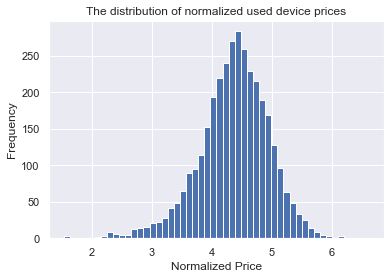

<IPython.core.display.Javascript object>

In [11]:
# plot histogram of the distribution
ax = df.normalized_used_price.plot(
    kind="hist", bins=50, title="The distribution of normalized used device prices"
)

ax.set_xlabel("Normalized Price")

- The dependent variable ('normalized_used_price') approximately follows a normal distribution
- The histogram is skewed towards the right, indicating that some device are sold much more higher than the average price.

#### 2. What percentage of the used device market is dominated by Android devices?

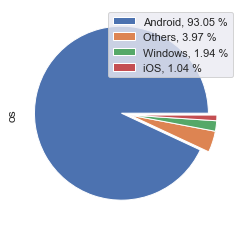

<IPython.core.display.Javascript object>

In [12]:
# group by OS type
dfOSGroups = df.groupby("os")

# count each group
counts = dfOSGroups.os.count()

# get labels, os and percentage
labels = [f"{os}, {count*100/sum(counts):.2f} %" for os, count in counts.iteritems()]

# separate Android from the rest
explode = [0.1, 0, 0, 0]

# plot pie chart without labels on chart itself
ax = dfOSGroups.os.count().plot(
    kind="pie", explode=explode, labels=["" for _ in dfOSGroups]
)

# add legend with custom labels
ax.legend(labels)

Android dominates 93% of the used phones market

#### 3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?

Text(0, 0.5, 'Ram (GB)')

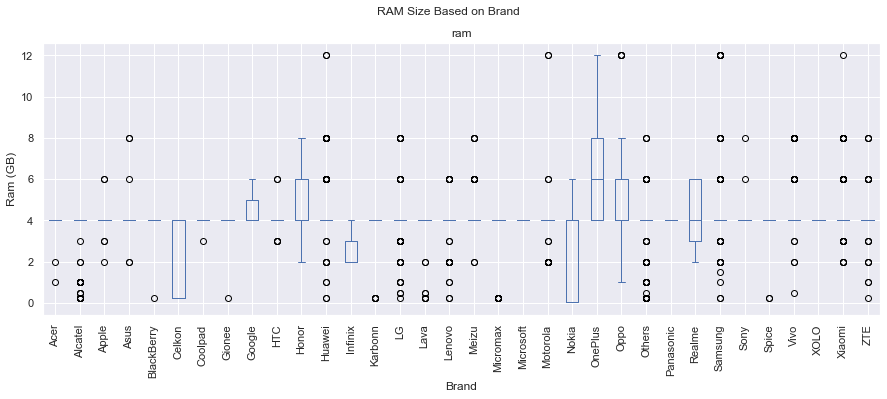

<IPython.core.display.Javascript object>

In [13]:
# plot box plot of ram based on brand
df.plot(
    kind="box",
    by="brand_name",
    column="ram",
    figsize=(15, 5),
    rot=90,
    color="b",
    title="RAM Size Based on Brand",
)

plt.xlabel("Brand")
plt.ylabel("Ram (GB)")

- The minimum, 25%, 50%, 75%, and maximum RAM (in GB) for several brands are all the same: 4GB.
- However, there are still outliers present, it means  some devices has low or no ram memory and others has very high GB for ram memory.

#### 4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?

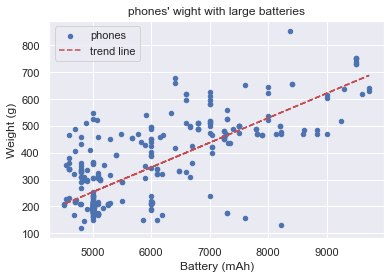

<IPython.core.display.Javascript object>

In [14]:
# filter data get phones with large batteries, get relative columns
df_lagrgeBattery = df[["battery", "weight"]][df.battery > 4500]

# plot variables against eachother
ax = df_lagrgeBattery.plot(
    kind="scatter",
    x="battery",
    y="weight",
    color="b",
    title="phones' wight with large batteries",
)

ax.set_xlabel("Battery (mAh)")
ax.set_ylabel("Weight (g)")

# get trend line
z = np.polyfit(df_lagrgeBattery.battery, df_lagrgeBattery.weight, 1)
p = np.poly1d(z)

# plot trend line
ax.plot(df_lagrgeBattery.battery, p(df_lagrgeBattery.battery), "r--")

# add legend
ax.legend(["phones", "trend line"])

- Linear correlation factor between phone's weight and battery
- As the battery size increases, so does the weight

#### 5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?

In [15]:
# 6 inches = 6*2.54cm = 15.24cm
df_largescreen = df[df["screen_size"] > 15.24]
print(df_largescreen.shape)

(1099, 15)


<IPython.core.display.Javascript object>

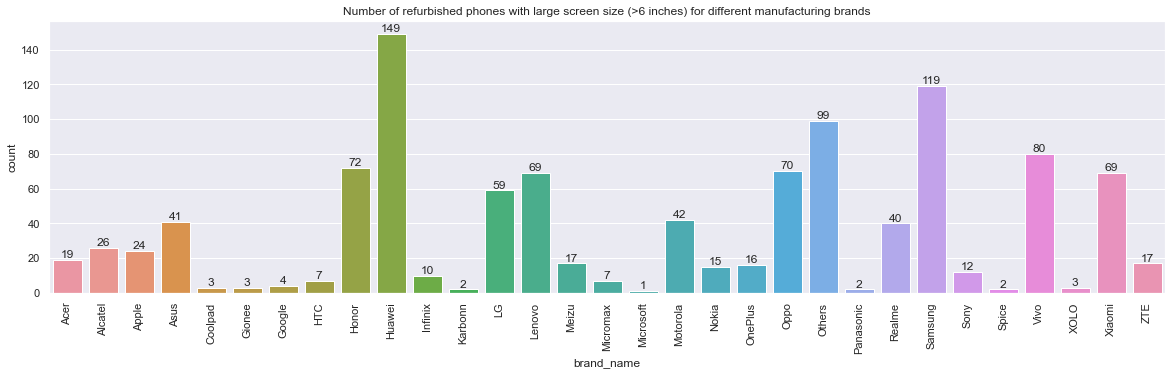

<IPython.core.display.Javascript object>

In [16]:
plt.figure(figsize=(20, 5))

ax = sns.countplot(
    data=df_largescreen.sort_values("brand_name", ascending=True), x="brand_name"
)
plt.xticks(rotation=90)
plt.title(
    "Number of refurbished phones with large screen size (>6 inches) for different manufacturing brands"
)
for p in ax.patches:
    label = p.get_height()
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(
        label,
        (x, y),
        ha="center",
        va="center",
        size=12,
        xytext=(0, 5),
        textcoords="offset points",
    )
plt.show()

- Huawei has the highest number of refurbished phones with large screen (i.e. 149 phones), followed by Samsung (119 phones),  Vivo (80 phones), Honor (72 phones), Oppo (70 phones) and Xiaomi (69 phones) among known manufacturing brands
- Microsoft (1 phone), Karbonn/Panasonic/Spice (2 phones) have the lowest number of refurbished phones with large screen size

#### 6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?

Text(0, 0.5, 'Count')

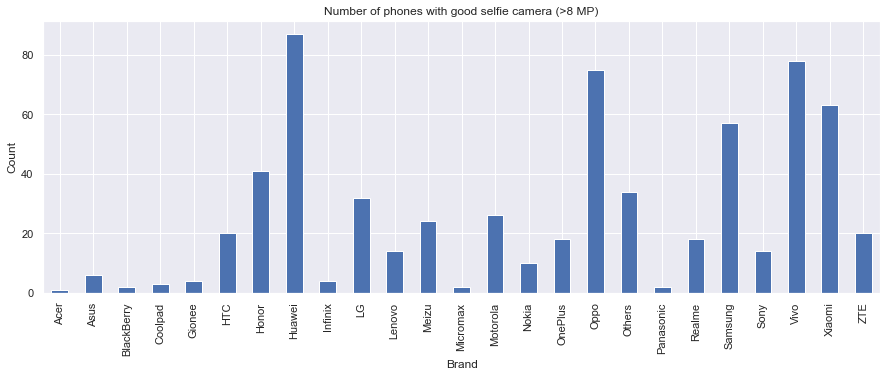

<IPython.core.display.Javascript object>

In [17]:
# filter data get phones with large screens, get relative columns
df_goodSelfie = df[["brand_name"]][df.selfie_camera_mp > 8]

# group by brand name
df_goodSelfien_grouped = df_goodSelfie.groupby("brand_name")

# plot count of each group
ax = df_goodSelfien_grouped.brand_name.count().plot(kind="bar", figsize=(15,5),
                                                     title="Number of phones with good selfie camera (>8 MP)")


ax.set_xlabel("Brand")
ax.set_ylabel("Count")


- Huawei (87 phones), Oppo (75 phones), Vivo (78 phones), Xiaomi (63 phones) and Samsung (57 phones) have some of the highest number of refurbished phones with a great selfie camera (>8MP) - similar brand names observed as for phones with large screen size
- Acer (1 phone), Blackberry/Micromax/Panasonic (2 phones) have some of the lowest number of refurbished phones with a great selfie camera (>8MP)

Text(0, 0.5, 'count')

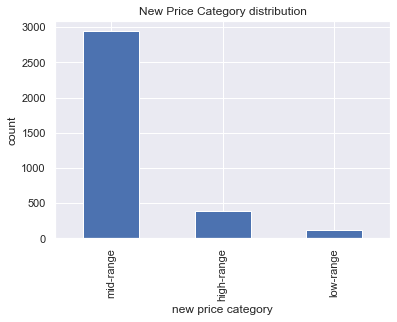

<IPython.core.display.Javascript object>

In [18]:
# We will now bucket the 34 manufacturing brands into 3 categories: low range (<4), mid range (5-6), high range (>6)
# cut new prices into 3 groups
priceCategories = pd.cut(x=df["normalized_new_price"], bins=[0, 4, 6, 8])

# plot the count of each group
ax = priceCategories.value_counts().plot(
    kind="bar", title="New Price Category distribution"
)

ax.set_xticklabels(["mid-range", "high-range", "low-range"])
ax.set_xlabel("new price category")
ax.set_ylabel("count")

- The number of phones with mid-range is the highest, which is around 3000. While the ones with low-range is the lowest (around 100).

#### 7. Which attributes are highly correlated with the normalized price of a used device?

Text(0, 0.5, 'correlation')

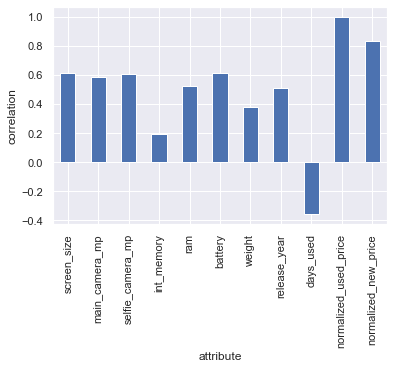

<IPython.core.display.Javascript object>

In [19]:
# get correlation matrix
corr = df.corr()

# plot correlation of all columns with normalized_used_price
ax = corr.normalized_used_price.plot(kind="bar")

ax.set_xlabel("attribute")
ax.set_ylabel("correlation")


The highest correlated attribute is the normalized_new_price. Other highly correlated attributes: battery, weight, selfie_camera_mp, main_camera_mp

## Data Preprocessing (do this part)

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

#### - Missing value treatment

In [20]:
# create a copy of the data
df1 = df.copy()

<IPython.core.display.Javascript object>

In [21]:
# checking for missing values
df1.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

<IPython.core.display.Javascript object>

- Let us impute missing values in the columns with median of the columns grouped by release year and brand name

In [22]:
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "ram",
    "battery",
    "weight",
]

# impute missing values in cols_impute with median by grouping the data on release year and brand name
for col in cols_impute:
    df1[col] = df1[col].fillna(
        value=df1.groupby(["brand_name", "release_year"])[col].transform("median")
    )

# checking for missing values
df1.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 0
ram                        0
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

<IPython.core.display.Javascript object>

- There are still have missing values
- Let us impute these missing values with median of the columns grouped by just brand name

In [23]:
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "battery",
    "weight",
]

# impute the missing values in cols_impute with median by grouping the data on brand name
for col in cols_impute:
    df1[col] = df1[col].fillna(
        value=df1.groupby(["brand_name"])[col].transform("median")
    )

# checking for missing values
df1.isnull().sum()

brand_name                0
os                        0
screen_size               0
4g                        0
5g                        0
main_camera_mp           10
selfie_camera_mp          0
int_memory                0
ram                       0
battery                   0
weight                    0
release_year              0
days_used                 0
normalized_used_price     0
normalized_new_price      0
dtype: int64

<IPython.core.display.Javascript object>

- main_camera_mp still has 10 missing values
- Let us impute these missing values with the median of the column(main_camera_mp)

In [24]:
# impute the remaining data with median
df1["main_camera_mp"] = df1["main_camera_mp"].fillna(df1["main_camera_mp"].median())

# checking for missing values
df1.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

<IPython.core.display.Javascript object>

- We have no more missing values

#### - Feature engineering (if needed)

- Let's create a new column years_since_release from the release_year column.
- We will consider the year of data collection, 2021, as the baseline.
- We will drop the release_year column.

In [25]:
# get years since release
df1["years_since_release"] = 2021 - df1["release_year"]
# remove release_year column (temporal variable, doesnt make any sense)
df1.drop("release_year", axis=1, inplace=True)

# describe the new column
df1["years_since_release"].describe()

count    3454.000000
mean        5.034742
std         2.298455
min         1.000000
25%         3.000000
50%         5.500000
75%         7.000000
max         8.000000
Name: years_since_release, dtype: float64

<IPython.core.display.Javascript object>

#### - Outlier detection and treatment (if needed)

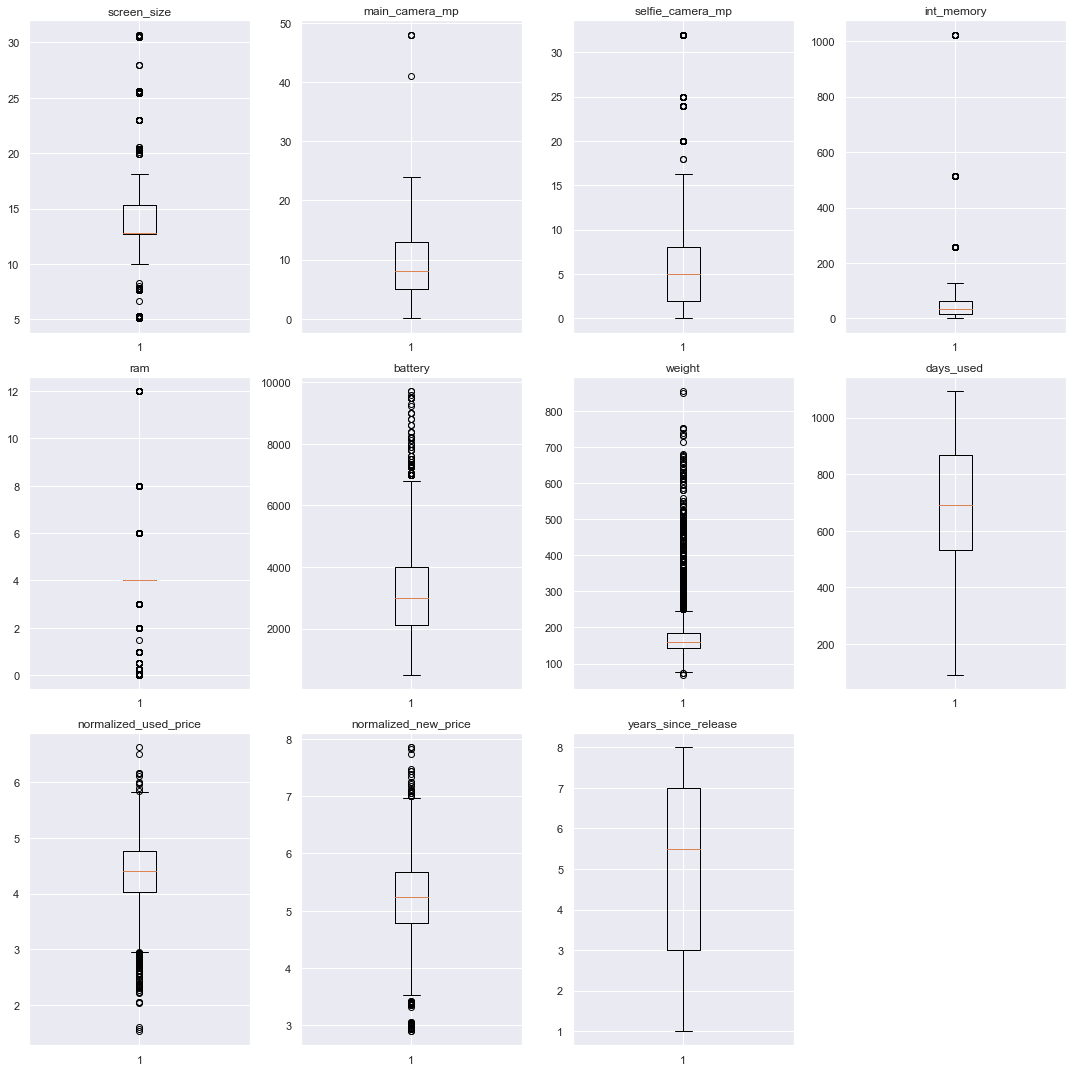

<IPython.core.display.Javascript object>

In [26]:
# outlier detection using boxplot
numeric_columns = df1.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 15))

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df1[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

 - All colums do have outliers in them excepted for days_used and years_since_release.

#### Treatment

In [27]:
# functions to treat outliers by flooring and capping


def treat_outliers(df, col):
    """
    Treats outliers in a variable

    df: dataframe
    col: dataframe column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    Treat outliers in a list of variables

    df: dataframe
    col_list: list of dataframe columns
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

<IPython.core.display.Javascript object>

In [28]:
# list of columns to treat for outliers
treat_out_cols = [
    "weight",
    "normalized_new_price",
    "normalized_used_price",
    "battery",
    "int_memory",
    "selfie_camera_mp",
    "main_camera_mp",
    "screen_size",
]

<IPython.core.display.Javascript object>

In [29]:
# create a new data frame after treating outliers in the colums
df2 = treat_outliers_all(df1, treat_out_cols)

<IPython.core.display.Javascript object>

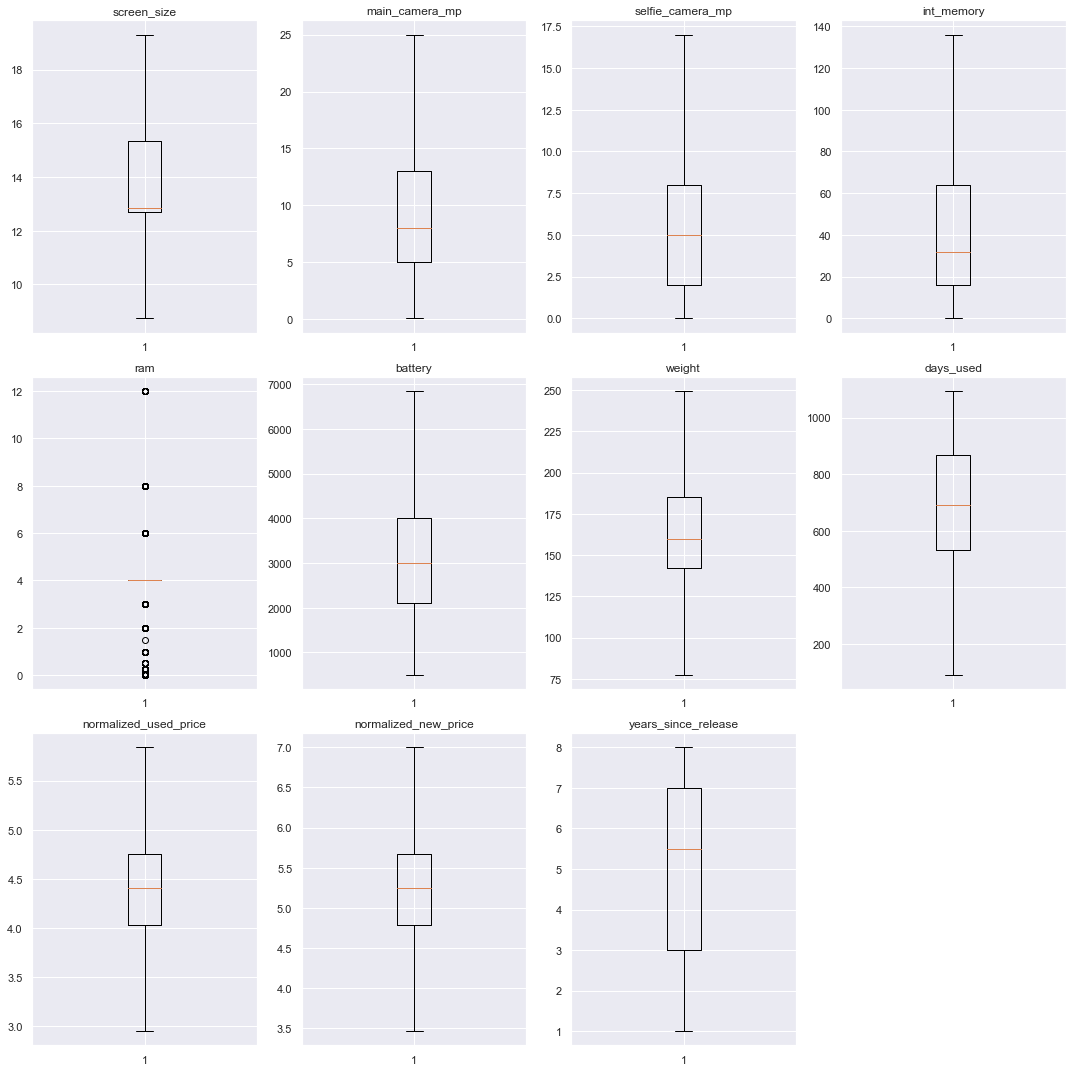

<IPython.core.display.Javascript object>

In [30]:
# outlier detection using boxplot
numeric_columns = df2.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 15))

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df1[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

- All outliers in the independent columns were treated apart from the ram column.
- From question 3 of EDA, We will drop "RAM" column as majority of dataset has a constant RAM of 4GB with a few upper and lower outliers.

In [31]:
df1.drop("ram", axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [32]:
numeric_columns.remove("ram")

<IPython.core.display.Javascript object>

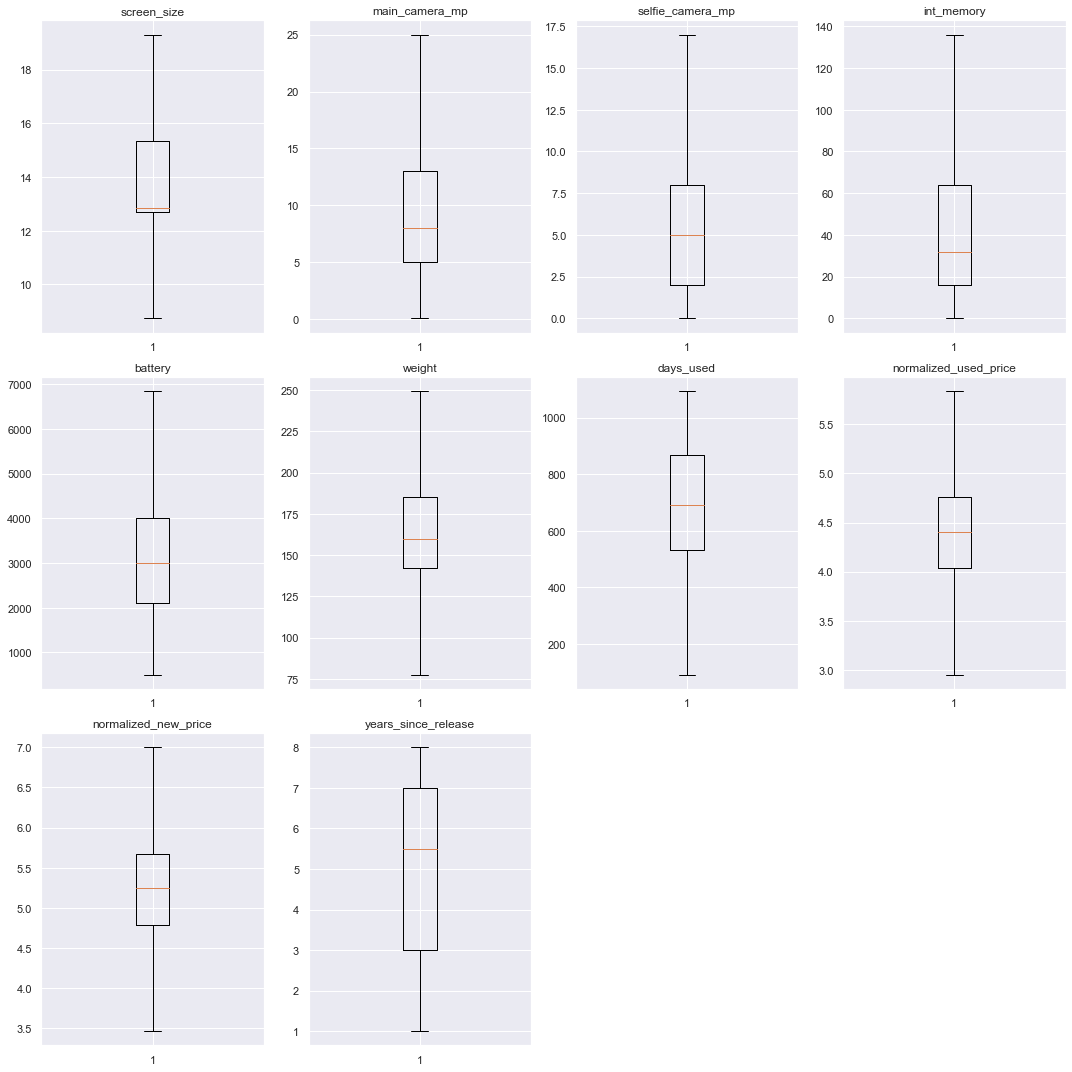

<IPython.core.display.Javascript object>

In [33]:
# outlier detection using boxplot
numeric_columns = df2.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 15))

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df1[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

- All outliers have been treated

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [34]:
# check the statistical summary once again
df2.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.551595,2.807499,8.74,12.7,12.83,15.34,19.3
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3454.0,NaN,NaN,NaN,9.586329,4.572418,0.08,5.0,8.0,13.0,25.0
selfie_camera_mp,3454.0,NaN,NaN,NaN,5.96242,5.345927,0.0,2.0,5.0,8.0,17.0
int_memory,3454.0,NaN,NaN,NaN,44.694079,39.079988,0.01,16.0,32.0,64.0,136.0
battery,3454.0,NaN,NaN,NaN,3109.100898,1212.793754,500.0,2100.0,3000.0,4000.0,6850.0
weight,3454.0,NaN,NaN,NaN,166.817371,38.857747,77.5,142.0,160.0,185.0,249.5


<IPython.core.display.Javascript object>

In [35]:
# check missing values of df2
df2.isnull().sum().sum()

0

<IPython.core.display.Javascript object>

In [36]:
# display the first 5 rows of df2
df2.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,battery,weight,days_used,normalized_used_price,normalized_new_price,years_since_release
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3020.0,146.0,127,4.307572,4.715100,1
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,4300.0,213.0,325,5.162097,5.519018,1
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,4200.0,213.0,162,5.111084,5.884631,1
3,Honor,Android,19.30,yes,yes,13.0,8.0,64.0,6850.0,249.5,345,5.135387,5.630961,1
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,5000.0,185.0,293,4.389995,4.947837,1


<IPython.core.display.Javascript object>

In [37]:
# check the unique value
df2["brand_name"].nunique()

34

<IPython.core.display.Javascript object>

- This column has a lot of categories (34), which means that after creating dummies, there will be a lot of columns. Let's get rid of it.

In [38]:
df2.drop(["brand_name"], axis=1, inplace=True)  # drop brand_name column
df2.head()

,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,battery,weight,days_used,normalized_used_price,normalized_new_price,years_since_release
0,Android,14.50,yes,no,13.0,5.0,64.0,3020.0,146.0,127,4.307572,4.715100,1
1,Android,17.30,yes,yes,13.0,16.0,128.0,4300.0,213.0,325,5.162097,5.519018,1
2,Android,16.69,yes,yes,13.0,8.0,128.0,4200.0,213.0,162,5.111084,5.884631,1
3,Android,19.30,yes,yes,13.0,8.0,64.0,6850.0,249.5,345,5.135387,5.630961,1
4,Android,15.32,yes,no,13.0,8.0,64.0,5000.0,185.0,293,4.389995,4.947837,1


<IPython.core.display.Javascript object>

- brand_name column dropped.

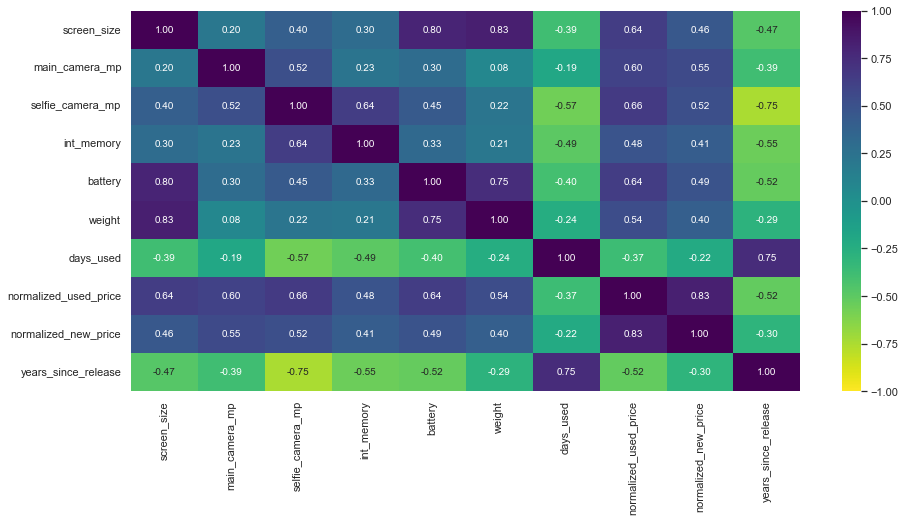

<IPython.core.display.Javascript object>

In [39]:
# Now let's plot the correlation coefficients as a heatmap AFTER Outlier treatment (df2)
plt.figure(figsize=(15, 7))
sns.heatmap(df2.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="viridis_r")
plt.show()

In [40]:
df2.corr()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,battery,weight,days_used,normalized_used_price,normalized_new_price,years_since_release
screen_size,1.000000,0.204570,0.403687,0.300567,0.803481,0.834742,-0.386352,0.641348,0.455358,-0.468920
main_camera_mp,0.204570,1.000000,0.520887,0.226755,0.298228,0.076556,-0.188209,0.604814,0.552803,-0.385520
selfie_camera_mp,0.403687,0.520887,1.000000,0.642208,0.445141,0.223409,-0.570164,0.662302,0.516408,-0.749158
int_memory,0.300567,0.226755,0.642208,1.000000,0.327993,0.208781,-0.494464,0.481600,0.414988,-0.549332
battery,0.803481,0.298228,0.445141,0.327993,1.000000,0.747080,-0.398989,0.641453,0.486278,-0.524084
weight,0.834742,0.076556,0.223409,0.208781,0.747080,1.000000,-0.238867,0.538237,0.402394,-0.285722
days_used,-0.386352,-0.188209,-0.570164,-0.494464,-0.398989,-0.238867,1.000000,-0.369863,-0.217342,0.750390
normalized_used_price,0.641348,0.604814,0.662302,0.481600,0.641453,0.538237,-0.369863,1.000000,0.828082,-0.519885
normalized_new_price,0.455358,0.552803,0.516408,0.414988,0.486278,0.402394,-0.217342,0.828082,1.000000,-0.302553
years_since_release,-0.468920,-0.385520,-0.749158,-0.549332,-0.524084,-0.285722,0.750390,-0.519885,-0.302553,1.000000


<IPython.core.display.Javascript object>

- Screen_size, main_camera_mp, selfie_camera_mp, int_memory, battery, normalized_new_price, weight have positive coefficients. So, as they increase, the price of used devices also increases.

#### Data preparation for modeling

In [41]:
# define dependent and independent variables
X = df2.drop(["normalized_used_price"], axis=1)
y = df2["normalized_used_price"]

print(X.head())
print()
print(y.head())

        os  screen_size   4g   5g  main_camera_mp  selfie_camera_mp  \
0  Android        14.50  yes   no            13.0               5.0   
1  Android        17.30  yes  yes            13.0              16.0   
2  Android        16.69  yes  yes            13.0               8.0   
3  Android        19.30  yes  yes            13.0               8.0   
4  Android        15.32  yes   no            13.0               8.0   

   int_memory  battery  weight  days_used  normalized_new_price  \
0        64.0   3020.0   146.0        127              4.715100   
1       128.0   4300.0   213.0        325              5.519018   
2       128.0   4200.0   213.0        162              5.884631   
3        64.0   6850.0   249.5        345              5.630961   
4        64.0   5000.0   185.0        293              4.947837   

   years_since_release  
0                    1  
1                    1  
2                    1  
3                    1  
4                    1  

0    4.307572
1    

<IPython.core.display.Javascript object>

In [42]:
# add the intercept to data
X = sm.add_constant(X)

<IPython.core.display.Javascript object>

In [43]:
# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

X.head()



,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,battery,weight,days_used,normalized_new_price,years_since_release,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3020.0,146.0,127,4.715100,1,0,0,0,1,0
1,1.0,17.30,13.0,16.0,128.0,4300.0,213.0,325,5.519018,1,0,0,0,1,1
2,1.0,16.69,13.0,8.0,128.0,4200.0,213.0,162,5.884631,1,0,0,0,1,1
3,1.0,19.30,13.0,8.0,64.0,6850.0,249.5,345,5.630961,1,0,0,0,1,1
4,1.0,15.32,13.0,8.0,64.0,5000.0,185.0,293,4.947837,1,0,0,0,1,0


<IPython.core.display.Javascript object>

In [44]:
X.shape

(3454, 15)

<IPython.core.display.Javascript object>

In [45]:
# splitting the data in 70:30 ratio for train to test data
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

<IPython.core.display.Javascript object>

In [46]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


<IPython.core.display.Javascript object>

## Model Building - Linear Regression

In [47]:
# fitting a linear model
olsmodel = sm.OLS(y_train, x_train).fit()
print(olsmodel.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.841
Method:                    Least Squares   F-statistic:                     913.3
Date:                   Sun, 09 Oct 2022   Prob (F-statistic):               0.00
Time:                           10:47:14   Log-Likelihood:                 180.11
No. Observations:                   2417   AIC:                            -330.2
Df Residuals:                       2402   BIC:                            -243.4
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

<IPython.core.display.Javascript object>

- Adjusted R-Squared is equal 0.841, which is good
- The y-intercept is equal to the value of the const coeffiecient which is 1.1698
- The coefficients of the different predictor variables is well listed in the model summary forexample;
- The coefficient of normalized_new_price is equal to 0.3960
- if the p-value is very high, there are some variables are reductant and not significant -> drop brand name to make p-value < 0.05
- the higher adjR2, the more accurate of the model is

## Model Performance Check

In [48]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [49]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, x_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.224595,0.17736,0.841858,0.84087,4.167574


<IPython.core.display.Javascript object>

In [50]:
# Checking model performance on test set
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, x_test, y_test)
olsmodel_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.223944,0.179852,0.839123,0.83676,4.192989


<IPython.core.display.Javascript object>

- The training  is 0.841, which means 84.1%. So the model is not underfitting.
- The train and test RMSE and MAE are comparable (close), so the model is not overfitting either.
- A mean error (MAE) of 0.1799 shows that the model can predict the price of a used device within that range.
- A MAPE of 4.19 based on the test data means that we can predict the prices of used devices to within 4.2%.

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

#### TEST FOR MULTICOLLINEARITY

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

<IPython.core.display.Javascript object>

In [52]:
checking_vif(x_train)

,feature,VIF
0,const,126.208008
1,screen_size,5.180671
2,main_camera_mp,2.172605
3,selfie_camera_mp,3.561893
4,int_memory,2.031449
5,battery,3.643153
6,weight,4.384869
7,days_used,2.480683
8,normalized_new_price,2.640945
9,years_since_release,4.949382


<IPython.core.display.Javascript object>

- If VIF is between 1 and 5, then there is low multicollinearity.
- If VIF is between 5 and 10, we say there is moderate multicollinearity.
- If VIF is exceeding 10, it shows signs of high multicollinearity.
- Therefore: - screen_size shows moderate collinearity. Let us go ahead and treat the multicollinearity

In [53]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

<IPython.core.display.Javascript object>

In [54]:
col_list = ["screen_size"]

res = treating_multicollinearity(x_train, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,screen_size,0.831952,0.23157


<IPython.core.display.Javascript object>

Therefore we'll drop screen_size and check the VIF again.

In [55]:
col_to_drop = "screen_size"
x_train2 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)]
x_test2 = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  screen_size


,feature,VIF
0,const,109.960713
1,main_camera_mp,2.167107
2,selfie_camera_mp,3.537312
3,int_memory,2.028173
4,battery,3.298705
5,weight,2.659448
6,days_used,2.473587
7,normalized_new_price,2.627941
8,years_since_release,4.873495
9,os_Others,1.227859


<IPython.core.display.Javascript object>

- Hence the above predictors have no multicollinearity and the assumption is satisfied
- Let us check the model summary again

In [56]:
olsmod1 = sm.OLS(y_train, x_train2).fit()
print(olsmod1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.833
Model:                               OLS   Adj. R-squared:                  0.832
Method:                    Least Squares   F-statistic:                     921.1
Date:                   Sun, 09 Oct 2022   Prob (F-statistic):               0.00
Time:                           10:47:26   Log-Likelihood:                 113.21
No. Observations:                   2417   AIC:                            -198.4
Df Residuals:                       2403   BIC:                            -117.3
Df Model:                             13                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

<IPython.core.display.Javascript object>

- We can see that adj. R-squared has changed from 0.841 to 0.832 which shows that the dropped column had much effect on the model.
- As there is no multicollinearity, we can look at the p-values of predictor variables to check their significance.

#### Dropping high p-value variables

Instead of removing the variables with p-value > 0.05, we will: 
- Build a model, check the p-values of the variables, and drop the column with the highest p-value.
- Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
- Repeat the above two steps till there are no columns with p-value > 0.05.

In [57]:
predictors = x_train2
predictors

,const,main_camera_mp,selfie_camera_mp,int_memory,battery,weight,days_used,normalized_new_price,years_since_release,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
1744,1.0,13.0,1.3,32.0,2440.0,121.0,632,5.477969,7,0,0,0,1,0
3141,1.0,8.0,2.0,32.0,1800.0,166.0,828,4.593604,6,0,0,0,0,0
1233,1.0,13.0,5.0,32.0,2600.0,165.0,620,5.523179,7,0,0,0,0,0
3046,1.0,5.0,0.3,16.0,2000.0,150.0,739,4.939640,8,0,0,0,0,0
2649,1.0,8.0,1.9,32.0,2100.0,134.0,785,4.702751,8,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,1.0,13.0,8.0,32.0,3020.0,150.0,283,4.610357,2,0,0,0,1,0
1130,1.0,13.0,5.0,32.0,3000.0,165.0,904,5.294410,7,0,0,0,1,0
1294,1.0,13.0,8.0,64.0,4000.0,170.0,706,5.390760,3,0,0,0,1,0
860,1.0,8.0,2.0,32.0,2200.0,139.0,637,5.003611,7,0,1,0,0,0


<IPython.core.display.Javascript object>

In [58]:
# initial list of columns
cols = x_train2.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = x_train2[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'main_camera_mp', 'selfie_camera_mp', 'battery', 'weight', 'normalized_new_price', 'years_since_release']


<IPython.core.display.Javascript object>

In [59]:
x_train3 = x_train2[["const"] + selected_features]
x_test3 = x_test2[["const"] + selected_features]

<IPython.core.display.Javascript object>

In [60]:
# print model summary
olsmod2 = sm.OLS(y_train, x_train3).fit()
print(olsmod2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.832
Model:                               OLS   Adj. R-squared:                  0.832
Method:                    Least Squares   F-statistic:                     1991.
Date:                   Sun, 09 Oct 2022   Prob (F-statistic):               0.00
Time:                           10:47:30   Log-Likelihood:                 108.07
No. Observations:                   2417   AIC:                            -202.1
Df Residuals:                       2410   BIC:                            -161.6
Df Model:                              6                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

<IPython.core.display.Javascript object>

- Now, no feature (other than the constant) has a p-value greater than 0.05, so we'll use the features in x train3 as the final set of predictor variables and olsmod2 as the final model.
- Now, the adjusted R-squared value is 0.832, which means that our model can explain about 83% of the variation. The model is good because of this.
- In olsmodel, where we looked at all of the variables, the adjusted R-squared was 0.832. This shows that the variables we took out didn't have much of an effect on the model.

#### TEST FOR LINEARITY AND INDEPENDENCE

In [61]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
1744,4.261975,4.264041,-0.002066
3141,4.175156,3.928034,0.247123
1233,4.117410,4.488655,-0.371245
3046,3.782597,3.903572,-0.120974
2649,3.981922,3.854052,0.127870


<IPython.core.display.Javascript object>

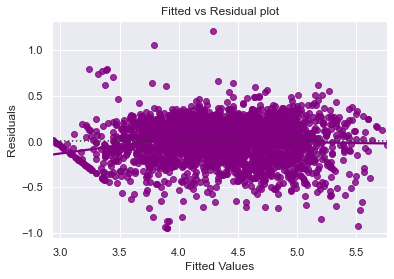

<IPython.core.display.Javascript object>

In [62]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

- The scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values).
- There is no pattern in the plot above. Hence, the assumptions of linearity and independence are satisfied.

#### TEST FOR NORMALITY

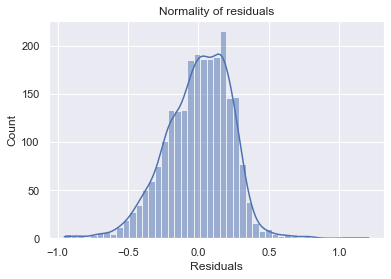

<IPython.core.display.Javascript object>

In [63]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

- The histogram of residuals does have a bell shape.
- Let's check the Q-Q plot.

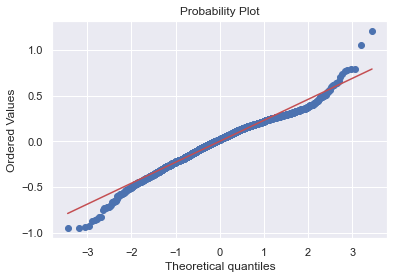

<IPython.core.display.Javascript object>

In [64]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

- The residuals more or less follow a straight line except for the tails.
- Let's us see the results of the Shapiro-Wilk test.

In [65]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9810413718223572, pvalue=1.995171052570356e-17)

<IPython.core.display.Javascript object>

- The Shapiro-Wilk test says that the residuals are not normal because the p-value is less than 0.05.
- But as a rough estimate, we can think of this distribution as close to normal. So, we can say that the assumption is true.

#### TEST FOR HOMOSCEDASTICITY

In [66]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train3)
lzip(name, test)

[('F statistic', 1.0095157703353355), ('p-value', 0.43482035974660294)]

<IPython.core.display.Javascript object>

- Since p-value > 0.05, we can say that the residuals are homoscedastic. So, this assumption is satisfied.

Now that we have checked all the assumptions of linear regression and they are satisfied, let's go ahead with prediction.

In [67]:
# predictions on the test set
pred = olsmod2.predict(x_test3)

df_pred_test = pd.DataFrame({"Actual": y_test ** (3), "Predicted": pred ** (3)})
print("Sample of Actual and Predicted used_price by the ML model (in €)")
df_pred_test.sample(10, random_state=1)

Sample of Actual and Predicted used_price by the ML model (in €)


,Actual,Predicted
1174,94.430815,90.568049
2247,81.238798,66.212932
2991,73.078043,61.810534
2997,79.009214,79.849972
2982,100.529127,100.694775
479,78.660741,74.567407
17,109.011245,111.346647
471,105.280149,88.169874
2918,90.069046,86.841551
602,57.177211,70.070159


<IPython.core.display.Javascript object>

- Here, we can see that our model's predictions are pretty good, and the actual and predicted values are comparable.
- We can also see the results of comparing 25 records as a bar graph.

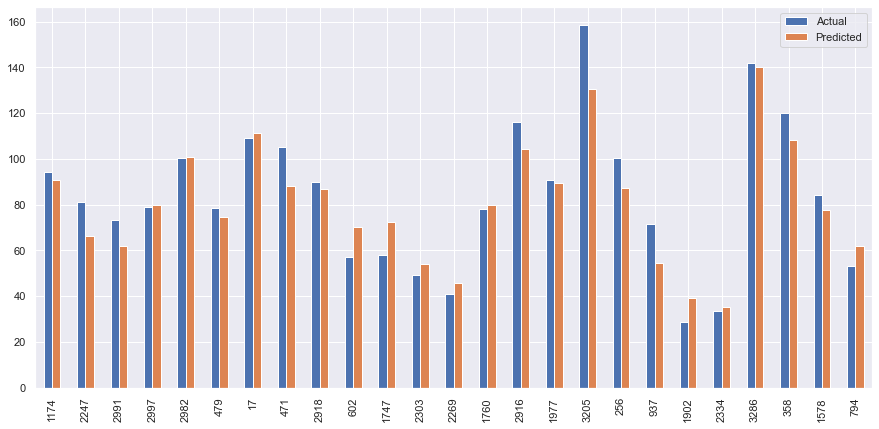

<IPython.core.display.Javascript object>

In [68]:
df3 = df_pred_test.sample(25, random_state=1)
df3.plot(kind="bar", figsize=(15, 7))
plt.show()

## Final Model

In [69]:
olsmodel_final = sm.OLS(y_train, x_train3).fit()
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.832
Model:                               OLS   Adj. R-squared:                  0.832
Method:                    Least Squares   F-statistic:                     1991.
Date:                   Sun, 09 Oct 2022   Prob (F-statistic):               0.00
Time:                           10:47:44   Log-Likelihood:                 108.07
No. Observations:                   2417   AIC:                            -202.1
Df Residuals:                       2410   BIC:                            -161.6
Df Model:                              6                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

<IPython.core.display.Javascript object>

In [70]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmod2_train_perf = model_performance_regression(olsmodel_final, x_train3, y_train)
olsmod2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.23139,0.182041,0.832145,0.831587,4.28006


<IPython.core.display.Javascript object>

In [71]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmod2_test_perf = model_performance_regression(olsmodel_final, x_test3, y_test)
olsmod2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.227382,0.182662,0.834146,0.832855,4.262054


<IPython.core.display.Javascript object>

#### Summary:
- The model can explain about 83% of the variation in the data, which is great.
- The RMSE and MAE for both the train and test are low and comparable. So, our model doesn't have the problem of being too good.
- The Mean Absolute Percentage Error (MAPE) on the test set shows that we can predict the prices of used devices to within 4.3% error, which is good because it is a low value.
- So, we can say that the olsmod2 model is good for both making predictions and drawing conclusions.

## Actionable Insights and Recommendations 

### Actionable insights

- The RAM on the refurbished phones was found to be about 4GB on average across all of the phones in the dataset. This is not significant.
- Like RAM, it was found that almost 93% of phones ran on Android OS, which is also not a good predictor.
- Huawei has the highest number of the refurbish phones with large screen size (>6 inches) and high-quality selfie camera (>8MP). 
- Panasonic has the lowest number of the refurbish phones with large screen size (>6 inches) and high-quality selfie camera (>8MP). 
- normalized_new_price has a strong positive correlation with used price. Other positive ones are screen_size, main_camera_mp, selfie_camera_mp, int_memory, battery and weight. This means as they increase, the price of used devices also increases.
- days_used is negatively correlated to the price of used devices, which means it increases, the price of used devices decreases.
- The model is able to explain ~83% of the variation in the data and within 4.3 % of the price of used devices on the test data, which is good. This indicates that the model is good for prediction as well as inference purposes.
- If the main_camera_mp increases by one unit, then its price increases by 0.0214 units, all other variables held constant.
- If the selfie_camera_mp increases by one unit, then its price increases by 0.0183 units, all other variables held constant.
- If the years_since_release increases by one unit, then its price decreases by 0.0165 units, all other variables held constant.


### Recommendations

- As the price of the used devices increases with the increasing quality of main camera, selfie camera, internal memory and battery, the company should improve those factors to attract more customers.
- As the price of the used devices increases with the increase of the new device's price, the company can execute marketing campaigns to promote the price of both devices.
- Since the number of days the device used and years since release of the device will nagatively impact on the price of the used devices, retailers should run device checks and repairs to make the customers feel more secure when they buy the old device. Therefore, the sales of refurbished devices will increase.

___